In [1]:

import keras

from keras import backend as k
from keras.models import Sequential
from keras.layers import Layer
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.layers import Flatten
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Model
import itertools
import numpy as np
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


In [2]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_path = "DAtaset/Train"

test_path = "DAtaset/Test/"

validation_path = "DAtaset/Valid/"

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path,target_size=(224,224),classes=["benign",'malignant'],batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path,target_size=(224,224),classes=["benign",'malignant'],batch_size=10,shuffle=False)

validation_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(validation_path,target_size=(224,224),classes=["benign",'malignant'],batch_size=10)

Found 170 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [5]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [6]:
imgs, labels = next(train_batches)

/home/nitin/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


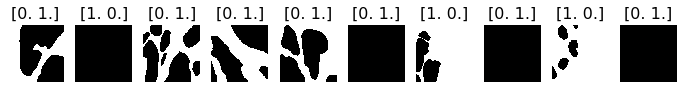

In [7]:
plots(imgs, titles=labels)

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
mobile = keras.applications.mobilenet.MobileNet()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [11]:
x = mobile.layers[-6].output
prediction = Dense(2,activation='softmax')(x)


In [12]:
model = Model(input=mobile.input,output= prediction )

/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


# Choosing Last 23 layer to train model 

In [13]:
for layer in model.layers[:-26]:
    layer.trainable = False


In [14]:
model.compile(Adam(0.001),loss = categorical_crossentropy,metrics=["accuracy"])

In [15]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=validation_batches,validation_steps= 18,epochs=25,verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/25
 - 13s - loss: 0.4953 - acc: 0.7250 - val_loss: 6.1354 - val_acc: 0.4500
Epoch 2/25
 - 12s - loss: 1.3451 - acc: 0.7000 - val_loss: 0.9480 - val_acc: 0.6556
Epoch 3/25
 - 11s - loss: 0.1733 - acc: 0.9250 - val_loss: 0.3763 - val_acc: 0.8722
Epoch 4/25
 - 11s - loss: 1.7567 - acc: 0.7500 - val_loss: 3.9428 - val_acc: 0.6389
Epoch 5/25
 - 12s - loss: 0.6937 - acc: 0.8750 - val_loss: 3.4498 - val_acc: 0.6222
Epoch 6/25
 - 12s - loss: 0.1073 - acc: 0.9500 - val_loss: 2.4176 - val_acc: 0.6722
Epoch 7/25
 - 13s - loss: 1.0240 - acc: 0.8250 - val_loss: 0.2835 - val_acc: 0.8222
Epoch 8/25
 - 15s - loss: 0.1660 - acc: 0.9250 - val_loss: 1.2459 - val_acc: 0.8056
Epoch 9/25
 - 13s - loss: 0.4240 - acc: 0.9000 - val_loss: 0.3536 - val_acc: 0.8778
Epoch 10/25
 - 12s - loss: 0.7933 - acc: 0.8500 - val_loss: 1.4323 - val_acc: 0.6333
Epoch 11/25
 - 12s - loss: 1.1300 - acc: 0.7500 - val_loss: 0.516

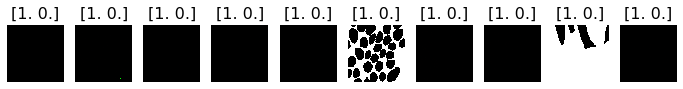

In [16]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)


In [17]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [18]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [19]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[10]]


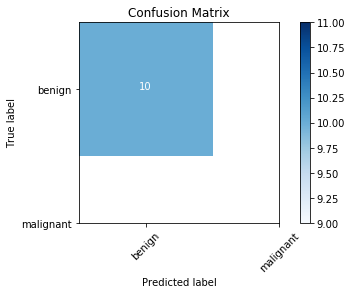

In [20]:
cm_plot_labels = ['benign','malignant']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')